# This script contains:
# 1. Import Libraries and Datasets
# 2. Data Checks
# 3. Create Regional Segmentation of Data
# 4. Determine whether there's a difference in spending habits between the US regions using "spending_flag" and "region"
# 5. Create exclusion flag for low-activity customers and exclude them from the data. Export this sample (Task Question 4)
# 6. Rename Cleaned Dataframe
# 7. Create Customer Profile
# 8. Create Visualization to Show Distribution of Profiles
# 9. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
# 10. Compare customer profiles with regions and departments
# 11. Export Dataset
# ________________________________________________________________________________________

## 1. Import Libraries and Datasets

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
# import path
path = r"C:\Users\jwag1\March 2024 Instacart Basket Analysis"

In [3]:
# import ords_prods_cust.pkl
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_flags_datatypes_cleaned.pkl'))

## 2. Data Checks

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_sequence_number          int16   
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float64 
 6   first_order                    object  
 7   product_id                     int32   
 8   add_to_cart_order              int16   
 9   reordered                      int8    
 10  product_name                   category
 11  aisle_id                       int16   
 12  department_id                  int8    
 13  prices                         float64 
 14  _merge                         object  
 15  price_range_loc                object  
 16  busiest_day                    category
 17  busiest_days             

## 3. Create Regional Segmentation of Data

In [5]:
# map the dictionary for the regions
region_mapping = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
                  'New York', 'Pennsylvania', 'New Jersey'],
    'Midwest': ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 
                'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
              'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
              'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
    'West': ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
             'Washington', 'Oregon', 'California', 'Hawaii']}

# function to map states to region
def get_region(State):
    for region, states in region_mapping.items():
        if State in states:
            return region
    return 'Other'
    
# apply region function
df['region'] = df['State'].apply(get_region)

# print region column
print(df)

          order_id  user_id  order_sequence_number  orders_day_of_week  \
0          2539329        1                      1                   2   
1          2398795        1                      2                   3   
2           473747        1                      3                   3   
3          2254736        1                      4                   4   
4           431534        1                      5                   4   
...            ...      ...                    ...                 ...   
32404854    156685   106143                     26                   4   
32404855    484769    66343                      1                   6   
32404856   1561557    66343                      2                   1   
32404857    276317    66343                      3                   6   
32404858   2922475    66343                      4                   1   

          order_hour_of_day  days_since_prior_order      first_order  \
0                         8            

In [6]:
# check for missing values in "region" column
missing_values = df['region'].isna().sum()
print(missing_values)

0


## 4. Determine whether there's a difference in spending habits between the US regions using "spending_flag" and "region"

In [7]:
# calculate the number of "spending_flag" in each region
spending_by_region = df.groupby('region')['spending_flag'].value_counts().unstack(fill_value = 0)

# calculate the percentage of High spenders for each region
spending_by_region['Percentage of High spenders'] = ((spending_by_region['High spender'] / (spending_by_region['High spender'] + spending_by_region['Low spender'])) * 100).map('{:.2f}%'.format)

print(spending_by_region)

spending_flag  High spender  Low spender Percentage of High spenders
region                                                              
Midwest               29265      7568060                       0.39%
Northeast             18642      5704094                       0.33%
South                 40579     10751306                       0.38%
West                  31242      8261671                       0.38%


## 5. Create exclusion flag for low-activity customers and exclude them from the data.  Export this sample (Task Question 4)

In [8]:
# create a new column called "exclusion_flag" and use this to create an exclusion flag column according to criteria (via the loc() function)
df['exclusion_flag'] = df.groupby(['user_id'])['order_sequence_number'].transform(np.max)

# create a flag that assings an "exclusion" label to a user ID based on its corresponding exclusion_flag value
df.loc[df['user_id'] >= 5, 'exclusion_flag'] = 'High-activity customer'
df.loc[df['user_id'] < 5, 'exclusion_flag'] = 'Low-activity customer'

# convert column to category type data
category_cols_to_convert = ['exclusion_flag']

for col in category_cols_to_convert:
    df[col] = df[col].astype('category')    

df['exclusion_flag'].value_counts(dropna = False)

C:\Users\jwag1\AppData\Local\Temp\ipykernel_7704\415200195.py:2: FutureWarning: The provided callable <function max at 0x0000022F4CDF5620> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['exclusion_flag'] = df.groupby(['user_id'])['order_sequence_number'].transform(np.max)
C:\Users\jwag1\AppData\Local\Temp\ipykernel_7704\415200195.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High-activity customer' has dtype incompatible with int16, please explicitly cast to a compatible dtype first.
  df.loc[df['user_id'] >= 5, 'exclusion_flag'] = 'High-activity customer'


exclusion_flag
High-activity customer    32404499
Low-activity customer          360
Name: count, dtype: int64

In [9]:
# filter df by "exclusion_flag"
high_activity_customers = df[df['exclusion_flag'] == 'High-activity customer']
low_activity_customers = df[df['exclusion_flag'] == 'Low-activity customer']

# set index to False before exporting to pickle
high_activity_customers = high_activity_customers.reset_index(drop=True)
low_activity_customers = low_activity_customers.reset_index(drop=True)

# export filtered dataframes to separate csv files
high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_clean.pkl'))
low_activity_customers.to_csv(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_low_activity.csv'), index = False)

## 6. Rename Cleaned Dataframe

In [10]:
# rename cleaned dataframe to "df_high"
df_high = high_activity_customers

# drop "exclusion_flag" column from "df_high"
df_high.drop(columns=['exclusion_flag'], inplace = True)

In [11]:
df_high.describe()

order_id       user_id  order_sequence_number  orders_day_of_week  \
count  3.240450e+07  3.240450e+07           3.240450e+07        3.240450e+07   
mean   1.710744e+06  1.029384e+05           1.714242e+01        2.738875e+00   
std    9.872994e+05  5.946544e+04           1.753538e+01        2.090082e+00   
min    2.000000e+00  5.000000e+00           1.000000e+00        0.000000e+00   
25%    8.559470e+05  5.142200e+04           5.000000e+00        1.000000e+00   
50%    1.711049e+06  1.026170e+05           1.100000e+01        3.000000e+00   
75%    2.565502e+06  1.543890e+05           2.400000e+01        5.000000e+00   
max    3.421083e+06  2.062090e+05           9.900000e+01        6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       3.240450e+07            3.032844e+07  3.240450e+07   
mean        1.342516e+01            1.110403e+01  2.559867e+04   
std         4.246387e+00            8.779052e+00  1.408399e+04   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            5.000000e+00  1.354400e+04   
50%         1.300000e+01            8.000000e+00  2.530300e+04   
75%         1.600000e+01            1.500000e+01  3.794700e+04   
max         2.300000e+01            3.000000e+01  4.968800e+04   

       add_to_cart_order     reordered      aisle_id  department_id  \
count       3.240450e+07  3.240450e+07  3.240450e+07   3.240450e+07   
mean        8.352568e+00  5.895880e-01  7.119615e+01   9.919770e+00   
std         7.127088e+00  4.919085e-01  3.821136e+01   6.281477e+00   
min         1.000000e+00  0.000000e+00  1.000000e+00   1.000000e+00   
25%         3.000000e+00  0.000000e+00  3.100000e+01   4.000000e+00   
50%         6.000000e+00  1.000000e+00  8.300000e+01   9.000000e+00   
75%         1.100000e+01  1.000000e+00  1.070000e+02   1.600000e+01   
max         1.450000e+02  1.000000e+00  1.340000e+02   2.100000e+01   

             prices     max_order   prices_mean  \
count  3.239937e+07  3.240450e+07  3.240450e+07   
mean   7.790997e+00  3.305240e+01  7.790999e+00   
std    4.241816e+00  2.515529e+01  7.348192e-01   
min    1.000000e+00  1.000000e+00  1.000000e+00   
25%    4.200000e+00  1.300000e+01  7.378488e+00   
50%    7.400000e+00  2.600000e+01  7.811946e+00   
75%    1.130000e+01  4.700000e+01  8.229341e+00   
max    2.500000e+01  9.900000e+01  2.320000e+01   

       days_since_prior_order_median           Age  n_dependants        income  
count                   3.240449e+07  3.240450e+07  3.240450e+07  3.240450e+07  
mean                    1.039772e+01  4.946525e+01  1.501879e+00  9.943810e+04  
std                     7.131774e+00  1.848559e+01  1.118860e+00  4.305733e+04  
min                     0.000000e+00  1.800000e+01  0.000000e+00  2.590300e+04  
25%                     6.000000e+00  3.300000e+01  1.000000e+00  6.700400e+04  
50%                     8.000000e+00  4.900000e+01  2.000000e+00  9.661800e+04  
75%                     1.300000e+01  6.500000e+01  3.000000e+00  1.279120e+05  
max                     3.000000e+01  8.100000e+01  3.000000e+00  5.939010e+05

In [12]:
print(df_high.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404499 entries, 0 to 32404498
Data columns (total 34 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_sequence_number          int16   
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float64 
 6   first_order                    object  
 7   product_id                     int32   
 8   add_to_cart_order              int16   
 9   reordered                      int8    
 10  product_name                   category
 11  aisle_id                       int16   
 12  department_id                  int8    
 13  prices                         float64 
 14  _merge                         object  
 15  price_range_loc                object  
 16  busiest_day                    category
 17  busiest_days             

## 7. Create Customer Profile

In [13]:
# define customer_profile with Age, income_level, fam_status
def create_customer_profile(row):
    # define age group
    if 18 <= row['Age'] <= 35:
        age_group = "Young Adult (18-35)"
    elif 36 <= row['Age'] <= 55:
        age_group = "Middle-aged (36-55)"
    else:
        age_group = "Senior (55+)"
    
    # define income level
    if row['income'] < 67000:
        income_level = "Low Income"
    elif row['income'] < 128000:
        income_level = "Middle Income"
    else:
        income_level = "High Income"
    
    # define family status description
    fam_status_desc = row['fam_status']
    if fam_status_desc == "divorced/widowed":
        fam_status_desc = "Divorced/Widowed"
    elif fam_status_desc == "living with parents and siblings":
        fam_status_desc = "Living with parents and siblings"
    
    # combine components to create the customer profile
    profile = f"{age_group}, {income_level}, {fam_status_desc}"
    return profile    

# apply the function to create a new column 'customer_profile'
df_high['customer_profile'] = df_high.apply(create_customer_profile, axis=1)

In [14]:
# view unique values in "customer_profile"
unique_profiles = df_high['customer_profile'].unique()
print(unique_profiles)

['Senior (55+), Low Income, Divorced/Widowed'
 'Senior (55+), High Income, married'
 'Senior (55+), Middle Income, Divorced/Widowed'
 'Middle-aged (36-55), Low Income, married'
 'Middle-aged (36-55), Middle Income, married'
 'Senior (55+), Low Income, married'
 'Senior (55+), Middle Income, married'
 'Young Adult (18-35), Low Income, married'
 'Middle-aged (36-55), Middle Income, single'
 'Young Adult (18-35), Middle Income, married'
 'Young Adult (18-35), Low Income, single'
 'Middle-aged (36-55), Low Income, single'
 'Young Adult (18-35), Low Income, Living with parents and siblings'
 'Young Adult (18-35), Middle Income, Living with parents and siblings'
 'Middle-aged (36-55), High Income, married'
 'Senior (55+), High Income, Divorced/Widowed'
 'Senior (55+), High Income, single'
 'Young Adult (18-35), Middle Income, single'
 'Middle-aged (36-55), High Income, single'
 'Senior (55+), Middle Income, single' 'Senior (55+), Low Income, single'
 'Young Adult (18-35), High Income, marrie

## 8. Create Visualization to Show Distribution of Profiles

In [15]:
# set the size of the plot
plt.figure(figsize=(10, 6))

# create the count plot
sns.countplot(y='customer_profile', data=df_high, order=df_high['customer_profile'].value_counts().index)

# remove y-axis label
plt.ylabel('')

# adjust x-axis ticks and labels
plt.xticks([0, 1e6, 2e6, 3e6, 4e6, 5e6], ['0', '1', '2', '3', '4', '5'])

# set x-axis title
plt.xlabel('Count (In Millions)')

# set title
plt.title('Distribution of Customer Profiles')

# save bar chart to "Visualizations" folder
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profile_age_income_famstatus.png'))

# show plot
plt.show()

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

## 9. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [ ]:
# group the data by 'customer_profile' and calculate max, mean, and min for order frequency and total spending
profile_stats = df_high.groupby('customer_profile').agg({
    'days_since_prior_order': ['max', 'mean', 'min'],  # Order frequency
    'prices': ['max', 'mean', 'min']  # Total spending
})

# rename the columns for clarity
profile_stats.columns = ['max_order_frequency', 'mean_order_frequency', 'min_order_frequency',
                         'max_total_spending', 'mean_total_spending', 'min_total_spending']

# display the aggregated statistics
print(profile_stats)

## 10. Compare customer profiles with regions and departments

In [ ]:
# view unique values in the 'region' column
unique_regions = df_high['region'].unique()
print("Unique values in the 'region' column:")
print(unique_regions)

# view unique values in the 'department_id' column
unique_department_ids = df_high['department_id'].unique()
print("\nUnique values in the 'department_id' column:")
print(unique_department_ids)

#####     Create Bar Chart for Customer Profiles by Region

In [16]:
# define a custom color palette
custom_palette = sns.color_palette("Paired", n_colors=len(profile_region_prop.columns))

# plot the proportions using a horizontal bar plot 
plt.figure(figsize=(12, 8))
ax = profile_region_prop.plot(kind='barh', stacked=True, color=custom_palette)
plt.title('Proportions of Customer Profiles by Region')
plt.xlabel('Proportion')  # Update x-axis label to indicate proportions
plt.ylabel('')  # Remove "Region" from y-axis label
plt.legend(title='Customer Region')

# add a note below the x-axis title
plt.text(0.5, -0.15, 'Note: Each color within the bars represents a percentage contribution to its total, which sums up to 100%',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, color='gray')

# save bar chart to Visualizations folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles_by_region.png'))

plt.show()

NameError: name 'profile_region_prop' is not defined

#####     Create Bar Chart for Customer Profiles by Department

<Figure size 1200x800 with 0 Axes>

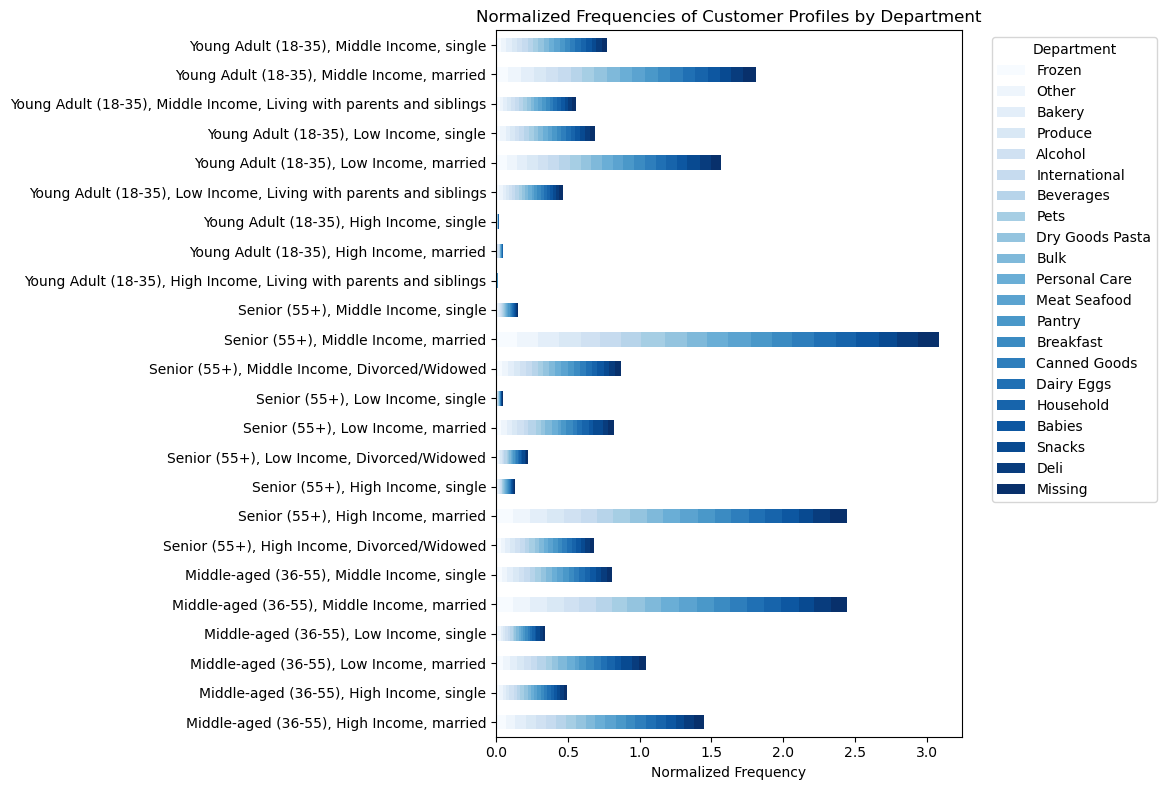

In [65]:
# calculate the frequency of each customer profile within each department
profile_department_freq = df_high.groupby(['customer_profile', 'department_id']).size().unstack(fill_value=0)

# define department names
department_names = {
    1: 'Frozen',
    2: 'Other',
    3: 'Bakery',
    4: 'Produce',
    5: 'Alcohol',
    6: 'International',
    7: 'Beverages',
    8: 'Pets',
    9: 'Dry Goods Pasta',
    10: 'Bulk',
    11: 'Personal Care',
    12: 'Meat Seafood',
    13: 'Pantry',
    14: 'Breakfast',
    15: 'Canned Goods',
    16: 'Dairy Eggs',
    17: 'Household',
    18: 'Babies',
    19: 'Snacks',
    20: 'Deli',
    21: 'Missing'
}

# plot the normalized frequencies using a horizontal stacked bar chart
plt.figure(figsize=(12, 8))
ax = profile_department_freq_norm.plot(kind='barh', stacked=True, cmap='Blues', figsize=(12, 8))

# get the legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# replace the labels with department names
new_labels = [department_names[int(label)] for label in labels]

# update the legend with department names
ax.legend(handles, new_labels, title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Normalized Frequencies of Customer Profiles by Department')
plt.xlabel('Normalized Frequency')
plt.ylabel('')  # Remove y-axis title
plt.tight_layout()

# save bar chart to Visualizations folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles_by_department.png'))


plt.show()

## 11. Export Dataset

In [66]:
# export df_high to pickle file
df_high.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_clean_FINAL.pkl'))